In [20]:

!pip install scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stast

In [21]:




import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [22]:
np.random.seed(42)


In [23]:
data ={
    'product_id': range(1,21),
    'product_name':[f'Product{i}' for i in range(1,21)],
    'category':np.random.choice(['Electronics','Clothings','Home','Sports'],20),
    'units_sold': np.random.poisson(lam=20,size=20), 
    'sale_date':pd.date_range(start='2025-01-01',periods=20,freq='D')
    
}
sales_data=pd.DataFrame(data)

print("Sales Data:")
print(sales_data)

Sales Data:
    product_id product_name     category  units_sold  sale_date
0            1     Product1         Home          25 2025-01-01
1            2     Product2       Sports          15 2025-01-02
2            3     Product3  Electronics          17 2025-01-03
3            4     Product4         Home          19 2025-01-04
4            5     Product5         Home          21 2025-01-05
5            6     Product6       Sports          17 2025-01-06
6            7     Product7  Electronics          19 2025-01-07
7            8     Product8  Electronics          16 2025-01-08
8            9     Product9         Home          21 2025-01-09
9           10    Product10    Clothings          21 2025-01-10
10          11    Product11         Home          17 2025-01-11
11          12    Product12         Home          22 2025-01-12
12          13    Product13         Home          14 2025-01-13
13          14    Product14         Home          17 2025-01-14
14          15    Product15 

In [24]:
sales_data.to_csv('sales_data.csv',index=False)

In [25]:
import os
os.getcwd()


'c:\\Users\\khush\\Desktop\\NIT pr'

In [26]:
#Descriptive Statistics
descriptive_stats = sales_data['units_sold'].describe()

print("\nDescriptive Statistics for Unit Sold")
print(descriptive_stats)

mean_sales=sales_data['units_sold'].mean()
median_sales=sales_data['units_sold'].median()
mode_sales=sales_data['units_sold'].mode()[0]
variance_sales=sales_data['units_sold'].var()
std_derivation_sales=sales_data['units_sold'].std()



Descriptive Statistics for Unit Sold
count    20.000000
mean     18.800000
std       3.302312
min      13.000000
25%      17.000000
50%      18.500000
75%      21.000000
max      25.000000
Name: units_sold, dtype: float64


In [27]:
category_stats=sales_data.groupby('category')['units_sold'].agg(['sum','mean','std']).reset_index()
category_stats.columns=['Category','Total Unit Sold','Average Units Sold','Std Dev of Units Sold']

In [28]:
# Display the results
print("\nStatistical Analysis:")
print(f"Mean Units Sold: {mean_sales}")
print(f"Median Units Sold: {median_sales}")
print(f"Mode Units Sold: {mode_sales}")
print(f"Variance of Units Sold: {variance_sales}")
print(f"Standard Deviation of Units Sold: {std_derivation_sales}")
print("\nCategory Statistics:")
print(category_stats)


Statistical Analysis:
Mean Units Sold: 18.8
Median Units Sold: 18.5
Mode Units Sold: 17
Variance of Units Sold: 10.905263157894737
Standard Deviation of Units Sold: 3.302311789927586

Category Statistics:
      Category  Total Unit Sold  Average Units Sold  Std Dev of Units Sold
0    Clothings               21           21.000000                    NaN
1  Electronics               73           18.250000               2.217356
2         Home              181           20.111111               3.723051
3       Sports              101           16.833333               2.714160


In [29]:
confidence_level =0.95
degrees_freedom = len(sales_data['units_sold'])-1
sample_mean=mean_sales
sample_standard_error = std_derivation_sales / np.sqrt(len(sales_data['units_sold']))

In [30]:
t_score = stats.t.ppf((1+confidence_level)/ 2, degrees_freedom)
margin_of_error = t_score * sample_standard_error

confidence_interval = (sample_mean-margin_of_error,sample_mean+margin_of_error)
print("\nConfidence Interval for the mean of Units sold: ")
print(confidence_interval)


Confidence Interval for the mean of Units sold: 
(np.float64(17.254470507823573), np.float64(20.34552949217643))


In [31]:
# Hypothesis Testing (t-test)
# Null hypothesis: Mean units sold is equal to 20
# Alternative hypothesis: Mean units sold is not equal to 20

t_statistic, p_value = stats.ttest_1samp(sales_data['units_sold'], 20)

print("\nHypothesis Testing (t-test):")
print(f"T-statistic: {t_statistic}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The mean units sold is significantly different from 20.")
else:
    print("Fail to reject the null hypothesis: The mean units sold is not significantly different from 20.")


Hypothesis Testing (t-test):
T-statistic: -1.6250928099424466, P-value: 0.12061572226781002
Fail to reject the null hypothesis: The mean units sold is not significantly different from 20.


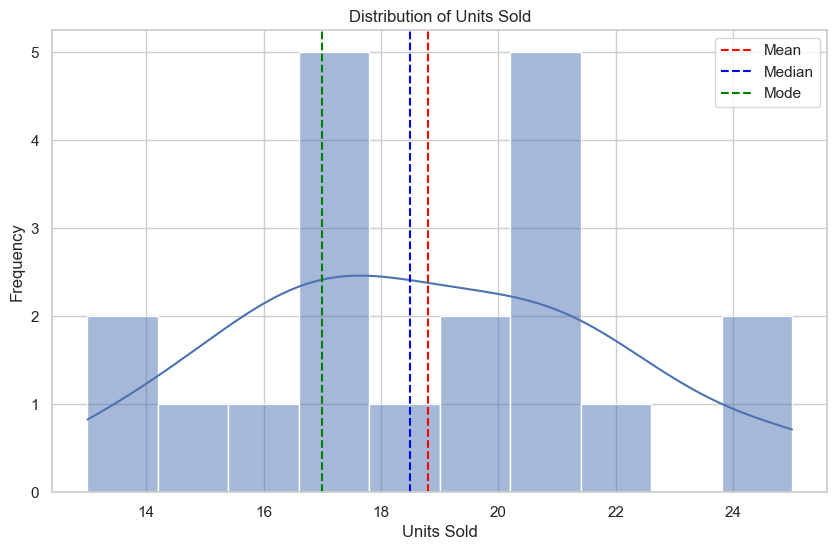

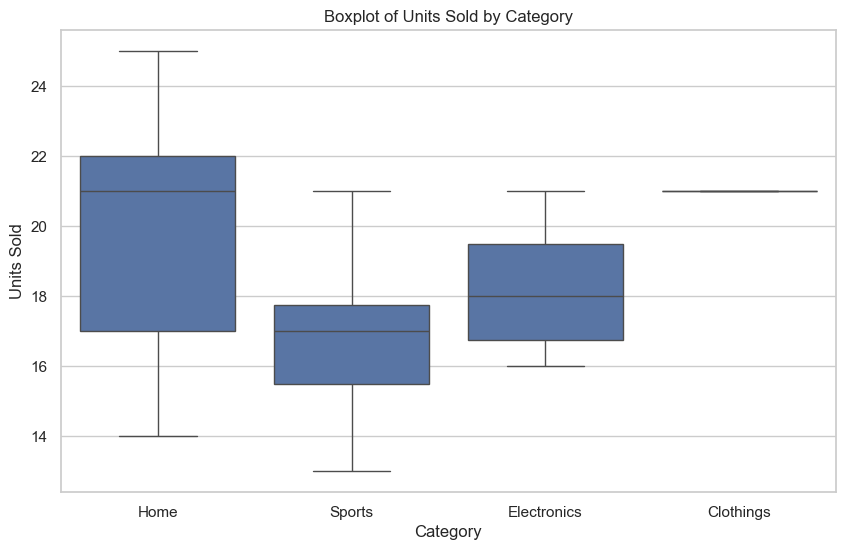

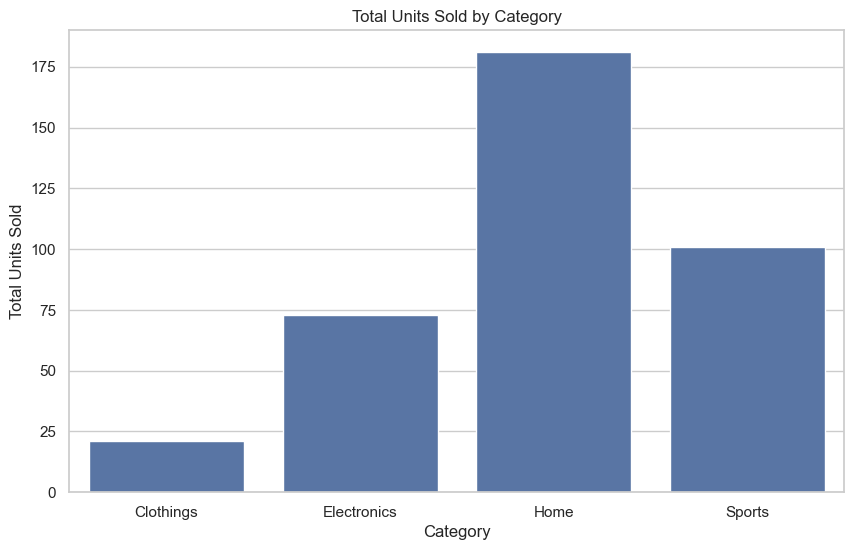

In [32]:
# Visualizations
sns.set(style="whitegrid")

# Plot distribution of units sold
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['units_sold'], bins=10, kde=True)
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.axvline(mean_sales, color='red', linestyle='--', label='Mean')
plt.axvline(median_sales, color='blue', linestyle='--', label='Median')
plt.axvline(mode_sales, color='green', linestyle='--', label='Mode')
plt.legend()
plt.show()

# Boxplot for units sold by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='units_sold', data=sales_data)
plt.title('Boxplot of Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Units Sold')
plt.show()

# Bar plot for total units sold by category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Total Unit Sold', data = category_stats)
plt.title('Total Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Total Units Sold')
plt.show()